In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bitcoin-price-usd/main.csv


In [52]:
df = pd.read_csv("/kaggle/input/bitcoin-price-usd/main.csv")

In [53]:
df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume
0,1609459200000,28923.63,28961.66,28913.12,28961.66,27.457032,1609459259999,7.943820e+05,1292,16.777195,485390.826825
1,1609459260000,28961.67,29017.50,28961.01,29009.91,58.477501,1609459319999,1.695803e+06,1651,33.733818,978176.468202
2,1609459320000,29009.54,29016.71,28973.58,28989.30,42.470329,1609459379999,1.231359e+06,986,13.247444,384076.854453
3,1609459380000,28989.68,28999.85,28972.33,28982.69,30.360677,1609459439999,8.800168e+05,959,9.456028,274083.075142
4,1609459440000,28982.67,28995.93,28971.80,28975.65,24.124339,1609459499999,6.992262e+05,726,6.814644,197519.374888


In [54]:
df["target"] = df["Close"].shift(-1)

In [55]:
df = df.dropna()

In [56]:
df.isnull().sum()

Open Time                       0
Open                            0
High                            0
Low                             0
Close                           0
Volume                          0
Close Time                      0
Quote asset volume              0
Number of trades                0
Taker buy base asset volume     0
Taker buy quote asset volume    0
target                          0
dtype: int64

In [57]:
df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,target
0,1609459200000,28923.63,28961.66,28913.12,28961.66,27.457032,1609459259999,7.943820e+05,1292,16.777195,485390.826825,29009.91
1,1609459260000,28961.67,29017.50,28961.01,29009.91,58.477501,1609459319999,1.695803e+06,1651,33.733818,978176.468202,28989.30
2,1609459320000,29009.54,29016.71,28973.58,28989.30,42.470329,1609459379999,1.231359e+06,986,13.247444,384076.854453,28982.69
3,1609459380000,28989.68,28999.85,28972.33,28982.69,30.360677,1609459439999,8.800168e+05,959,9.456028,274083.075142,28975.65
4,1609459440000,28982.67,28995.93,28971.80,28975.65,24.124339,1609459499999,6.992262e+05,726,6.814644,197519.374888,28937.11


In [58]:
df.shape

(188316, 12)

In [59]:
df.drop(["Open Time", "Close Time"], axis=1, inplace=True)

In [60]:
import tensorflow_decision_forests as tfdf

In [61]:
train_df = df.iloc[:150000]

In [62]:
train_df.shape

(150000, 10)

In [63]:
test_df = df.iloc[150000:]

In [64]:
test_df.shape

(38316, 10)

In [65]:
train_df.head()

,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,target
0,28923.63,28961.66,28913.12,28961.66,27.457032,7.943820e+05,1292,16.777195,485390.826825,29009.91
1,28961.67,29017.50,28961.01,29009.91,58.477501,1.695803e+06,1651,33.733818,978176.468202,28989.30
2,29009.54,29016.71,28973.58,28989.30,42.470329,1.231359e+06,986,13.247444,384076.854453,28982.69
3,28989.68,28999.85,28972.33,28982.69,30.360677,8.800168e+05,959,9.456028,274083.075142,28975.65
4,28982.67,28995.93,28971.80,28975.65,24.124339,6.992262e+05,726,6.814644,197519.374888,28937.11


In [66]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label="target", task=tfdf.keras.Task.REGRESSION)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_df, label="target", task=tfdf.keras.Task.REGRESSION)

In [67]:
model = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)

Use /tmp/tmp_zl8c85i as temporary training directory


In [68]:
model.fit(train_ds)

Reading training dataset...
Training dataset read in 0:00:01.655987. Found 150000 examples.
Training model...


[INFO 23-11-21 16:36:18.1009 UTC kernel.cc:1243] Loading model from path /tmp/tmp_zl8c85i/model/ with prefix a7ada8b5225a4a36
[INFO 23-11-21 16:36:42.5923 UTC decision_forest.cc:660] Model loaded with 300 root(s), 6015962 node(s), and 9 input feature(s).
[INFO 23-11-21 16:36:42.5924 UTC abstract_model.cc:1311] Engine "RandomForestOptPred" built
[INFO 23-11-21 16:36:42.5924 UTC kernel.cc:1075] Use fast generic engine


Model trained in 0:01:46.531941
Compiling model...
Model compiled.


In [69]:
import math
import matplotlib.pyplot as plt

In [70]:
model.compile(metrics=["mse", "mae"])
evaluation = model.evaluate(test_ds, return_dict=True)

print(evaluation)
print()
print(f"MSE: {evaluation['mae']}")
print(f"MSE: {evaluation['mse']}")
print(f"RMSE: {math.sqrt(evaluation['mse'])}")

39/39 [==============================] - 3s 54ms/step - loss: 0.0000e+00 - mse: 4531.9814 - mae: 46.8815
{'loss': 0.0, 'mse': 4531.9814453125, 'mae': 46.88152313232422}

MSE: 46.88152313232422
MSE: 4531.9814453125
RMSE: 67.31999290933192


In [71]:
test_df["pred"] = model.predict(test_ds)

39/39 [==============================] - 2s 53ms/step


/tmp/ipykernel_47/444206910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["pred"] = model.predict(test_ds)


In [74]:
test_df.reset_index(inplace=True)

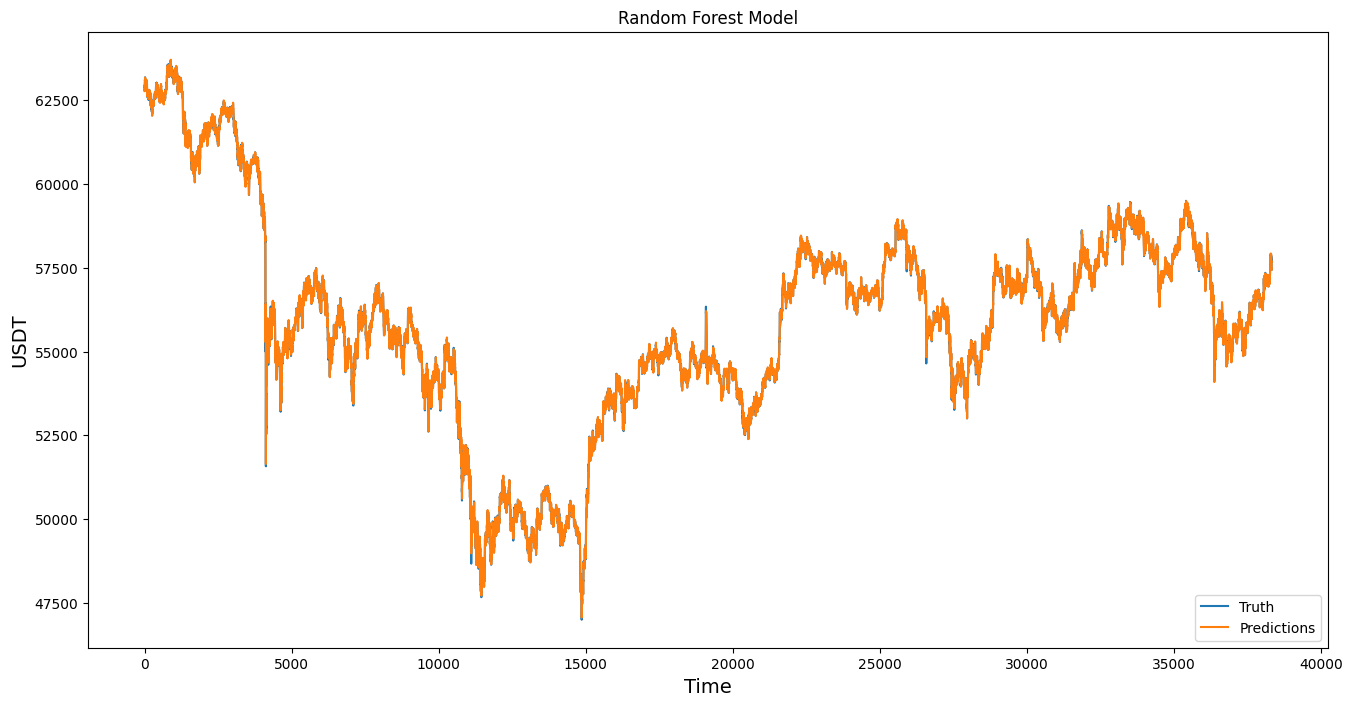

In [75]:
plt.figure(figsize=(16, 8))
plt.title("Random Forest Model")
plt.xlabel("Time", fontsize=14)
plt.ylabel("USDT", fontsize=14)
plt.plot(test_df["target"])
plt.plot(test_df["pred"])
plt.legend(["Truth", "Predictions"], loc="lower right")

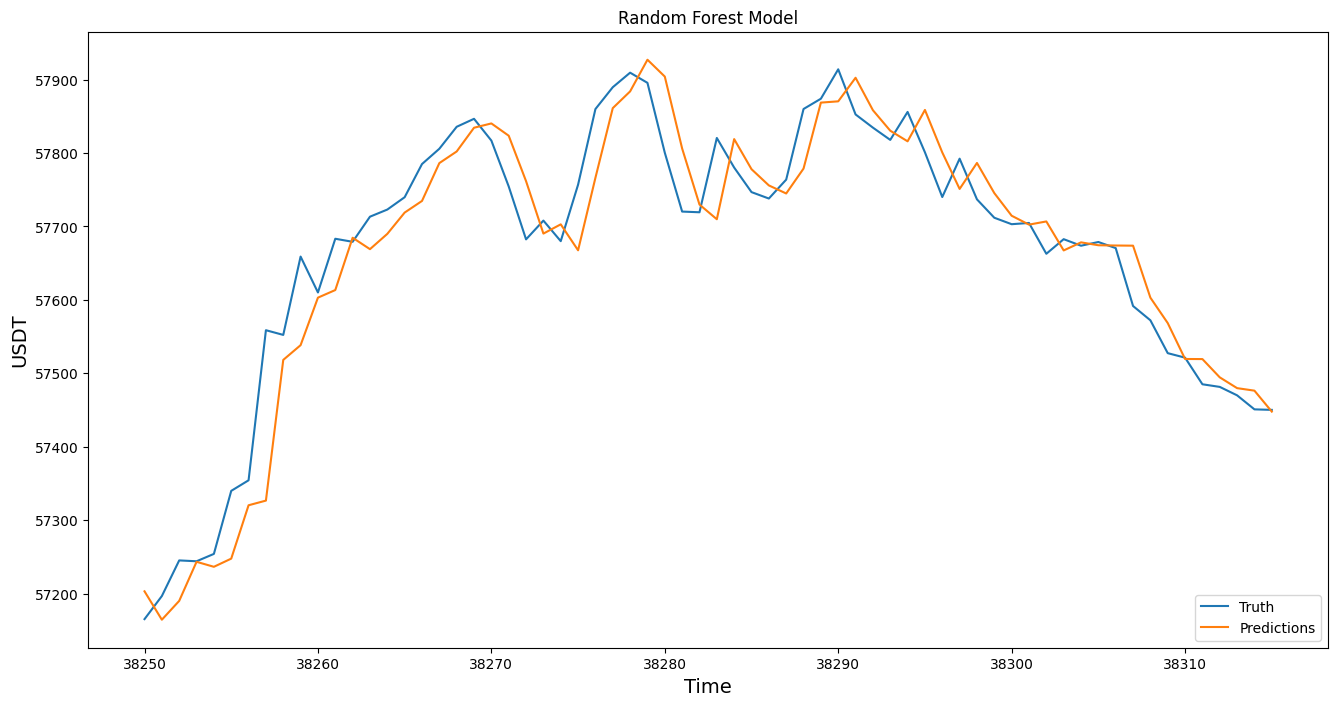

In [78]:
zoom = 38250
plt.figure(figsize=(16, 8))
plt.title("Random Forest Model")
plt.xlabel("Time", fontsize=14)
plt.ylabel("USDT", fontsize=14)
plt.plot(test_df["target"][zoom:])
plt.plot(test_df["pred"][zoom:])
plt.legend(["Truth", "Predictions"], loc="lower right")

In [90]:
test_df["target"][1]

62787.36

In [91]:
test_df["pred"][1]

62801.37

In [93]:
test_df["target"][1] - test_df["pred"][1]

-14.011093749999418

In [94]:
(test_df["target"][2] - test_df["pred"][2]) / test_df["target"][1] * 100

0.05554611230668223